In [133]:
# import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
import spacy
import os

In [134]:
pd.options.mode.chained_assignment = None
nltk.download('stopwords')

file_prefix = 'tweet'
text_field = 'text'
bag_size = 2000

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
# load data
# csvname="filtered_dataset/"+file_prefix+".csv" #changed
csvname=file_prefix+".csv" #changed
data_orig=pd.read_csv(csvname)
data=data_orig.copy()
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
rows=len(data)

In [136]:
# preprocess text data
def filter_text(in_data):
  data = in_data.copy()
  for i in range (0,rows):
    oldtext=data[text_field][i] 
    newtext=' '.join(re.sub("(@[A-Za-z0-9]+)| (_URL_) | (#[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",str(oldtext)).split()) # removes hashtags, https links, usernames.
    newtext= re.sub('[^a-zA-Z0-9]'," ",str(newtext)) #removes all other characters other than English Alpha-Numeric Characters
    newtext=newtext.lower()
    newtext=newtext.split()
    data[text_field][i]=newtext
  return data

In [137]:
filtered_data=filter_text(data)
filtered_data

,text,class
0,"[much, of, the, focus, on, recently, has, been...",0
1,"[icymi, the, first, probable, case, of, monkey...",0
2,"[who, outbreak, not, yet, a, global, public, h...",0
3,"[according, to, the, cdc, monkeypox, is, usual...",0
4,"[lgbtq, advocates, and, health, care, organiza...",0
...,...,...
5782,"[an, effort, has, been, to, perpetuate, varian...",1
5783,"[an, effort, has, been, to, perpetuate, varian...",1
5784,"[it, seems, we, have, a, new, variant, coming,...",1
5785,"[news, from, what, i, gather, monkey, pox, has...",1


In [138]:
def porterstemming(in_data):
  data = in_data.copy()
  for i in range (0,rows):
    ps=PorterStemmer()
    oldtext=data[text_field][i]
    newtext= [ps.stem(word) for word in oldtext if word not in set(stopwords.words('english'))]
    newtext=' '.join(newtext)
    data[text_field][i]=newtext
  return data

In [139]:
portered_stemmed_data=porterstemming(filtered_data)
portered_stemmed_data

,text,class
0,much focu recent affect peopl richer countri c...,0
1,icymi first probabl case monkeypox west virgin...,0
2,outbreak yet global public health emerg via url,0
3,accord cdc monkeypox usual spread prolong dire...,0
4,lgbtq advoc health care organ rais alarm thurs...,0
...,...,...
5782,effort perpetu variant fake virus sarscov2 cov...,1
5783,effort perpetu variant fake virus sarscov2 cov...,1
5784,seem new variant come cours forget evil monkey...,1
5785,news gather monkey pox shingl side effect vacc...,1


In [140]:
def lemmatization(in_data):
  data = in_data.copy()
  spc = spacy.load("en_core_web_sm")
  for i in range (0,rows):
    oldtext = ' '.join(item for item in data[text_field][i])
    doc = spc(oldtext)
    newtext=' '.join([str(token) for token in doc if token not in set(stopwords.words("english"))])
    newtext = re.sub(r'\s+', ' ', newtext)
    data[text_field][i]=newtext
  return data

In [141]:
lemmatization_data=lemmatization(filtered_data)
lemmatization_data

,text,class
0,much of the focus on recently has been on how ...,0
1,icymi the first probable case of monkeypox in ...,0
2,who outbreak not yet a global public health em...,0
3,according to the cdc monkeypox is usually spre...,0
4,lgbtq advocates and health care organizations ...,0
...,...,...
5782,an effort has been to perpetuate variants of f...,1
5783,an effort has been to perpetuate variants of f...,1
5784,it seems we have a new variant coming out and ...,1
5785,news from what i gather monkey pox has been sh...,1


In [142]:
def create_corpus_and_y(data):
  y=np.array(data["class"])
  corpus=[data[text_field][i] for i in range(len(data)) if len(data)!=0]
  return (y,corpus)

In [143]:
y_portered,portered_corpus=create_corpus_and_y(portered_stemmed_data)
y_lemmatization,lemmatization_corpus=create_corpus_and_y(lemmatization_data)

In [144]:
def count_vec(corpus):
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = bag_size)
  X = cv.fit_transform(corpus).toarray()
  return X

In [145]:
def tf_idf_vec(corpus):
  from sklearn.feature_extraction.text import TfidfVectorizer
  vectorizer = TfidfVectorizer(max_features=bag_size) # Add min_df, max_df parameters as well
  vectorizer.fit(corpus)
  X = vectorizer.transform(corpus)
  X=X.toarray()
  return X

In [146]:
X_portered_CV=count_vec(portered_corpus)
X_lemmatization_CV=count_vec(lemmatization_corpus)

In [147]:
df_portered_CV = pd.DataFrame(X_portered_CV)
df_portered_CV['class'] = y_portered
df_portered_CV

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
df_lemmatization_CV = pd.DataFrame(X_lemmatization_CV)
df_lemmatization_CV['class'] = y_lemmatization
df_lemmatization_CV

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
X_portered_TF_IDF=tf_idf_vec(portered_corpus)
X_lemmatization_TF_IDF=tf_idf_vec(lemmatization_corpus)

In [150]:
df_portered_TF_IDF = pd.DataFrame(X_portered_TF_IDF)
df_portered_TF_IDF['class'] = y_portered
df_portered_TF_IDF

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [151]:
df_lemmatization_TF_IDF = pd.DataFrame(X_lemmatization_TF_IDF)
df_lemmatization_TF_IDF['class'] = y_lemmatization
df_lemmatization_TF_IDF

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.211536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [152]:
#write processed dataset to .csv
os.makedirs('processed_dataset', exist_ok=True)
df_portered_CV.to_csv('processed_dataset/'+file_prefix+'_portered_CV.csv',index=False) 
df_lemmatization_CV.to_csv('processed_dataset/'+file_prefix+'_lemmatization_CV.csv',index=False)

In [153]:
df_portered_TF_IDF.to_csv('processed_dataset/'+file_prefix+'_portered_TF_IDF.csv',index=False) 
df_lemmatization_TF_IDF.to_csv('processed_dataset/'+file_prefix+'_lemmatization_TF_IDF.csv',index=False)

In [154]:
result_list = []

## PCA starts

In [155]:
# def split_data_train_test_split(X,y):
#  from sklearn.model_selection import train_test_split
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#  return(X_train, X_test,y_train,y_test)

import math
from sklearn.model_selection import train_test_split

def split_data_train_test_split(X,y):
    X_class = {
        0: [],
        1: []}
    for i in range(len(y)):
        X_class[y[i]].append(X[i])
    X_0_candidate = X_class[0][:len(X_class[1])]
    X_0_add = X_class[0][len(X_class[1]):]
    
    X_candidate = np.concatenate((X_0_candidate, X_class[1]))
    
    y_candidate = np.array([0 for i in range(len(X_0_candidate))])
    y_candidate = np.concatenate((y_candidate,np.array([1 for i in range(len(X_0_candidate))])))

    y_0_add = np.array([0 for i in range(len(X_0_add))])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_candidate, y_candidate, test_size = 0.2, random_state = 0)

#     X_test = np.concatenate((X_test, X_0_add))
#     y_test = np.concatenate((y_test, y_0_add))
    
    return(X_train, X_test,y_train,y_test)

In [156]:
from sklearn.decomposition import PCA
def perform_PCA (X_train, y_train, total_components, n_components):
  pca = PCA(n_components=total_components, random_state=0)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)

  print("Variance explained by all", total_components, "principal components =", sum(pca.explained_variance_ratio_ * 100))

  csum = np.cumsum(pca.explained_variance_ratio_ * 100)
  print(csum)
  print ()

  # plot 
  import matplotlib.pyplot as plt
  plt.plot(csum)
  plt.xlabel('Number of components')
  plt.ylabel('Explained variance')
  # plt.savefig('elbow_plot.png', dpi=100)

  # find the number of components
  print (csum[n_components-1])

  x_train_pca=[x[:n_components] for x in X_pca]

  print (len(x_train_pca[0]))
  print ()

  return x_train_pca

In [157]:
# PCA on lemmatization data
y = df_lemmatization_TF_IDF['class']
X_lemmatization_tf = df_lemmatization_TF_IDF.copy()
X_lemmatization_tf.drop ('class', axis=1, inplace=True)

X_lemmatization_cv = df_lemmatization_CV.copy()
X_lemmatization_cv.drop ('class', axis=1, inplace=True)

0.05
Variance explained by all 2000 principal components = 99.9999999999999
[  7.67290592  11.53283923  14.89499693 ... 100.         100.
 100.        ]

95.99323065286151
950



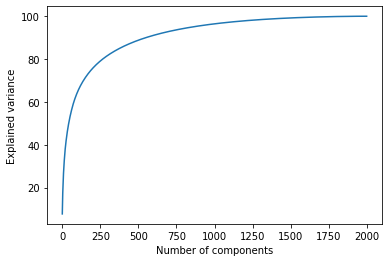

In [158]:
# PCA lemmatization CV
total_components = min(len(df_lemmatization_CV.columns)-1, len(X_lemmatization_cv))
print (100/total_components)
n_components = 950
X_lemmatization_cv_PCA = perform_PCA (X_lemmatization_cv, y, total_components, n_components)

0.05
Variance explained by all 2000 principal components = 99.99999999999996
[  2.4795586    4.53192747   6.01283722 ... 100.         100.
 100.        ]

95.814591480769
1300



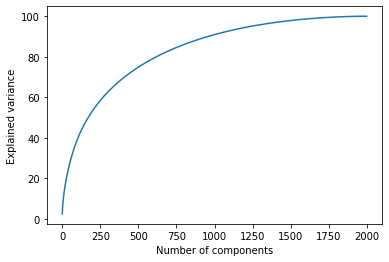

In [165]:
# PCA lemmatization TF IDF
total_components = min(len(df_lemmatization_TF_IDF.columns)-1, len(X_lemmatization_tf))
print (100/total_components)
n_components = 1300
X_lemmatization_tf_PCA = perform_PCA (X_lemmatization_tf, y, total_components, n_components)

In [166]:
X_train_lemmatization_cv, X_test_lemmatization_cv,y_train_lemmatization_cv,y_test_lemmatization_cv=split_data_train_test_split(X_lemmatization_cv_PCA,y)
X_train_lemmatization_tf, X_test_lemmatization_tf,y_train_lemmatization_tf,y_test_lemmatization_tf=split_data_train_test_split(X_lemmatization_tf_PCA,y)

In [167]:
# PCA on portered data
y = df_portered_TF_IDF['class']
X_portered_tf = df_portered_TF_IDF.copy()
X_portered_tf.drop ('class', axis=1, inplace=True)

X_portered_cv = df_portered_CV.copy()
X_portered_cv.drop ('class', axis=1, inplace=True)

0.05
Variance explained by all 2000 principal components = 99.99999999999976
[  5.70689882   8.78774852  11.34675429 ... 100.         100.
 100.        ]

96.03432160460967
1100



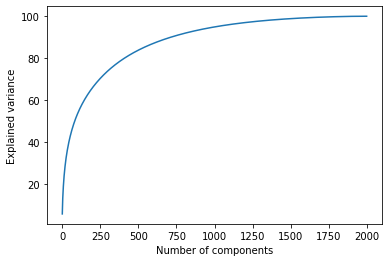

In [170]:
# PCA portered CV
total_components = min(len(df_portered_CV.columns)-1, len(X_portered_cv))
print (100/total_components)
n_components = 1100
X_portered_cv_PCA = perform_PCA (X_portered_cv, y, total_components, n_components)

0.05
Variance explained by all 2000 principal components = 99.99999999999991
[  2.86549313   4.97604969   6.36904749 ... 100.         100.
 100.        ]

95.39555293260148
1300



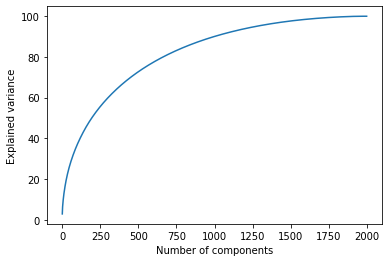

In [172]:
# PCA portered TF IDF
total_components = min(len(df_portered_TF_IDF.columns)-1, len(X_portered_tf))
print (100/total_components)
n_components = 1300
X_portered_tf_PCA = perform_PCA (X_portered_tf, y, total_components, n_components)

In [173]:
X_train_portered_cv, X_test_portered_cv,y_train_portered_cv,y_test_portered_cv=split_data_train_test_split(X_portered_cv_PCA,y)
X_train_portered_tf, X_test_portered_tf,y_train_portered_tf,y_test_portered_tf=split_data_train_test_split(X_portered_tf_PCA,y)

#Run Models

In [174]:
class Data:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

class Result:
    def __init__(self, y_test, y_pred, label=None):
        self.label = label
        self.accuracy = accuracy_score(y_test,y_pred) * 100
        self.precision = precision_score(y_test, y_pred, average='binary') * 100
        self.recall = recall_score(y_test, y_pred, average='binary') * 100
        self.f1 = f1_score(y_test, y_pred, average='binary') * 100
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        
    def show(self):
        print("Accuracy = ",self.accuracy,"%")
        print("Precision = ",self.precision)
        print("Recall = ",self.recall)
        print("F1 Score = ",self.f1)
        print("Confusion Matrix: \n", self.confusion_matrix)
        
def getResult(data, res, model_name):
    result = Result(data.y_test, res)
    result.show()
    result_list.append ([model_name, result.accuracy, result.precision, result.recall, result.f1])
    return result

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

def getBestModel(data, model, param_grid, cv=10):
    scorer = make_scorer(metrics.f1_score , average='binary')
    grid = GridSearchCV(model, 
                        param_grid,
                        cv=cv,
                        scoring=scorer)


    grid.fit(data.x_train, data.y_train)
    
    return grid

In [187]:
from sklearn.svm import SVC
from sklearn import svm

def runSVM(data, model_name):
    svm_param_grid = {'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5, 10], 
                      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                      'gamma': [1,0.1,0.01,0.001]
                     } 

    grid = getBestModel(data, svm.SVC(), svm_param_grid, cv=10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred, model_name)
    print(grid.best_params_)
    return grid

from sklearn.ensemble import RandomForestClassifier

def runRF(data, model_name):
    random_forest_params_grid = {
        'n_estimators': [i for i in range(100, 1000, 100)],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'random_state': [0]
    }

    grid = getBestModel(data, RandomForestClassifier(), random_forest_params_grid, 10)

    y_pred = grid.predict(data.x_test)
    getResult(data, y_pred, model_name)
    print(grid.best_params_)
    return grid
    
from sklearn.tree import DecisionTreeClassifier

def runDT(data, model_name):
    decision_tree_params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(100, 1000, 100)],
        'max_features': ['sqrt', 'log2'],
        'random_state': [0]
    }

    grid = getBestModel(data, DecisionTreeClassifier(), decision_tree_params)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred, model_name)

    print(grid.best_params_)
    return grid

from sklearn.neighbors import KNeighborsClassifier

def runKNN(data, model_name):

    knn_params_grid = {
        'n_neighbors': [i for i in [5, 10, 15, 20]],
        'p': [1,2],
        'metric' : ['minkowski','euclidean','manhattan', 'chebyshev'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    grid = getBestModel(data, KNeighborsClassifier(), knn_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred, model_name)

    print(grid.best_params_)
    return grid

from sklearn.naive_bayes import GaussianNB

def runNB(data, model_name):

    nb_params_grid = {
    }

    grid = getBestModel(data, GaussianNB(), nb_params_grid)

    y_pred = grid.predict(data.x_test)

    getResult(data, y_pred, model_name)

    print(grid.best_params_)
    return grid


In [176]:
data_lemmatization_cv = Data(X_train_lemmatization_cv, y_train_lemmatization_cv, X_test_lemmatization_cv, y_test_lemmatization_cv)
data_lemmatization_tf = Data(X_train_lemmatization_tf, y_train_lemmatization_tf, X_test_lemmatization_tf, y_test_lemmatization_tf)
data_portered_cv = Data(X_train_portered_cv, y_train_portered_cv, X_test_portered_cv, y_test_portered_cv)
data_portered_tf = Data(X_train_portered_tf, y_train_portered_tf, X_test_portered_tf, y_test_portered_tf)

In [177]:
print('Lemmatization CV')
grid = runSVM(data_lemmatization_cv, 'svm_lemma_cv')

print('\nLemmatization TF-IDF')
grid = runSVM(data_lemmatization_tf, 'svm_lemma_tf')

print('\nPortered CV')
grid = runSVM(data_portered_cv, 'svm_port_cv')

print('\nPortered TF-IDF')
grid = runSVM(data_portered_tf, 'svm_port_tf')

Lemmatization CV
Accuracy =  91.58878504672897 %
Precision =  90.65420560747664
Recall =  92.38095238095238
F1 Score =  91.50943396226417
Confusion Matrix: 
 [[198  20]
 [ 16 194]]
{'C': 5, 'gamma': 0.01, 'kernel': 'sigmoid'}

Lemmatization TF-IDF
Accuracy =  93.92523364485982 %
Precision =  92.20183486238533
Recall =  95.71428571428572
F1 Score =  93.92523364485982
Confusion Matrix: 
 [[201  17]
 [  9 201]]
{'C': 3, 'gamma': 1, 'kernel': 'rbf'}

Portered CV
Accuracy =  92.05607476635514 %
Precision =  91.9047619047619
Recall =  91.9047619047619
F1 Score =  91.9047619047619
Confusion Matrix: 
 [[201  17]
 [ 17 193]]
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Portered TF-IDF
Accuracy =  94.62616822429906 %
Precision =  93.48837209302326
Recall =  95.71428571428572
F1 Score =  94.58823529411765
Confusion Matrix: 
 [[204  14]
 [  9 201]]
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [178]:
print('Lemmatization CV')
grid = runRF(data_lemmatization_cv, 'rf_lemma_cv')

print('\nLemmatization TF-IDF')
grid = runRF(data_lemmatization_tf, 'rf_lemma_tf')

print('\nPortered CV')
grid = runRF(data_portered_cv, 'rf_port_cv')

print('\nPortered TF-IDF')
grid = runRF(data_portered_tf, 'rf_port_tf')

Lemmatization CV


KeyboardInterrupt: ignored

In [179]:
print('Lemmatization CV')
grid = runDT(data_lemmatization_cv, 'dt_lemma_cv')

print('\nLemmatization TF-IDF')
grid = runDT(data_lemmatization_tf, 'dt_lemma_tf')

print('\nPortered CV')
grid = runDT(data_portered_cv, 'dt_port_cv')

print('\nPortered TF-IDF')
grid = runDT(data_portered_tf, 'dt_port_tf')

Lemmatization CV
Accuracy =  68.69158878504673 %
Precision =  71.11111111111111
Recall =  60.952380952380956
F1 Score =  65.64102564102564
Confusion Matrix: 
 [[166  52]
 [ 82 128]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}

Lemmatization TF-IDF
Accuracy =  73.5981308411215 %
Precision =  75.12953367875647
Recall =  69.04761904761905
F1 Score =  71.96029776674936
Confusion Matrix: 
 [[170  48]
 [ 65 145]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}

Portered CV
Accuracy =  71.96261682242991 %
Precision =  70.64220183486239
Recall =  73.33333333333333
F1 Score =  71.9626168224299
Confusion Matrix: 
 [[154  64]
 [ 56 154]]
{'criterion': 'entropy', 'max_depth': 100, 'max_features': 'sqrt', 'random_state': 0}

Portered TF-IDF
Accuracy =  75.46728971962617 %
Precision =  77.2020725388601
Recall =  70.95238095238095
F1 Score =  73.94540942928039
Confusion Matrix: 
 [[174  44]
 [ 61 149]]
{'criterion': 'gini

In [188]:
print('Lemmatization CV')
grid = runKNN(data_lemmatization_cv, 'knn_lemma_cv')

print('\nLemmatization TF-IDF')
grid = runKNN(data_lemmatization_tf, 'knn_lemma_tf')

print('\nPortered CV')
grid = runKNN(data_portered_cv, 'knn_port_cv')

print('\nPortered TF-IDF')
grid = runKNN(data_portered_tf, 'knn_port_tf')

Lemmatization CV
Accuracy =  84.57943925233646 %
Precision =  83.02752293577981
Recall =  86.19047619047619
F1 Score =  84.57943925233646
Confusion Matrix: 
 [[181  37]
 [ 29 181]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}

Lemmatization TF-IDF
Accuracy =  92.5233644859813 %
Precision =  90.45454545454545
Recall =  94.76190476190476
F1 Score =  92.55813953488372
Confusion Matrix: 
 [[197  21]
 [ 11 199]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 15, 'p': 2}

Portered CV
Accuracy =  89.48598130841121 %
Precision =  87.33031674208145
Recall =  91.9047619047619
F1 Score =  89.55916473317865
Confusion Matrix: 
 [[190  28]
 [ 17 193]]
{'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}

Portered TF-IDF
Accuracy =  91.58878504672897 %
Precision =  91.0377358490566
Recall =  91.9047619047619
F1 Score =  91.4691943127962
Confusion Matrix: 
 [[199  19]
 [ 17 193]]
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 15,

In [181]:
print('Lemmatization CV')
grid = runNB(data_lemmatization_cv, 'nb_lemma_cv')

print('\nLemmatization TF-IDF')
grid = runNB(data_lemmatization_tf, 'nb_port_tf')

print('\nPortered CV')
grid = runNB(data_portered_cv, 'nb_port_cv')

print('\nPortered TF-IDF')
grid = runNB(data_portered_tf, 'nb_port_tf')

Lemmatization CV
Accuracy =  62.383177570093466 %
Precision =  62.82722513089005
Recall =  57.14285714285714
F1 Score =  59.850374064837894
Confusion Matrix: 
 [[147  71]
 [ 90 120]]
{}

Lemmatization TF-IDF
Accuracy =  66.35514018691589 %
Precision =  64.60176991150442
Recall =  69.52380952380952
F1 Score =  66.97247706422017
Confusion Matrix: 
 [[138  80]
 [ 64 146]]
{}

Portered CV
Accuracy =  64.48598130841121 %
Precision =  65.10416666666666
Recall =  59.523809523809526
F1 Score =  62.189054726368155
Confusion Matrix: 
 [[151  67]
 [ 85 125]]
{}

Portered TF-IDF
Accuracy =  64.95327102803739 %
Precision =  62.93103448275862
Recall =  69.52380952380952
F1 Score =  66.06334841628959
Confusion Matrix: 
 [[132  86]
 [ 64 146]]
{}


Write Results to csv

In [189]:
result_list

[['svm_lemma_cv',
  91.58878504672897,
  90.65420560747664,
  92.38095238095238,
  91.50943396226417],
 ['svm_lemma_tf',
  93.92523364485982,
  92.20183486238533,
  95.71428571428572,
  93.92523364485982],
 ['svm_port_cv',
  92.05607476635514,
  91.9047619047619,
  91.9047619047619,
  91.9047619047619],
 ['svm_port_tf',
  94.62616822429906,
  93.48837209302326,
  95.71428571428572,
  94.58823529411765],
 ['dt_lemma_cv',
  68.69158878504673,
  71.11111111111111,
  60.952380952380956,
  65.64102564102564],
 ['dt_lemma_tf',
  73.5981308411215,
  75.12953367875647,
  69.04761904761905,
  71.96029776674936],
 ['dt_port_cv',
  71.96261682242991,
  70.64220183486239,
  73.33333333333333,
  71.9626168224299],
 ['dt_port_tf',
  75.46728971962617,
  77.2020725388601,
  70.95238095238095,
  73.94540942928039],
 ['nb_lemma_cv',
  62.383177570093466,
  62.82722513089005,
  57.14285714285714,
  59.850374064837894],
 ['nb_port_tf',
  66.35514018691589,
  64.60176991150442,
  69.52380952380952,
  66.9

In [190]:
df = pd.DataFrame(result_list)
df.columns =['Model Name','Accuracy','Precision', 'Recall', 'F1-Score']

In [192]:
df.to_csv ('results_tweets_balanced_train_discard_excess0_without_rf.csv', index=False)